01. Import Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/kevinclancy/Desktop/NFL'

In [5]:
spreads = pd.read_csv(os.path.join(path, '02 Data', 'cleaned data', 'NFL_Spreads_update2.csv'))

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
spreads.shape

(2191, 30)

In [8]:
spreads.head()

,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser,cover_id
0,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado",0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR,DEN
1,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona",0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI,NE
2,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL,TB
3,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland",0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF,BAL
4,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas",0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL,Push


In [9]:
spreads.dtypes

season                   int64
week                     int64
day_of_week              int64
time_of_game            object
primetime                int64
playoff_game             int64
team_home               object
score_home               int64
score_away               int64
team_away               object
team_favored_id         object
point_spread           float64
total_line             float64
stadium                 object
game_location           object
stadium_neutral          int64
weather_temp             int64
wind_mph                 int64
indoor                   int64
point_differential       int64
total_points_scored      int64
favorite                 int64
total_result             int64
result                   int64
cover_result             int64
team_favored_id_int      int64
spread_category         object
winner                  object
loser                   object
cover_id                object
dtype: object

In [10]:
# take unique ids from team_favored_id column
team_id = sorted(spreads['team_home'].unique())

# create dict to map teams
team_id_map = {team_id: i + 1 for i, team_id in enumerate(team_id)}

In [11]:
print(team_id_map)

{'ARI': 1, 'ATL': 2, 'BAL': 3, 'BUF': 4, 'CAR': 5, 'CHI': 6, 'CIN': 7, 'CLE': 8, 'DAL': 9, 'DEN': 10, 'DET': 11, 'GB': 12, 'HOU': 13, 'IND': 14, 'JAX': 15, 'KC': 16, 'LAC': 17, 'LAR': 18, 'LVR': 19, 'MIA': 20, 'MIN': 21, 'NE': 22, 'NO': 23, 'NYG': 24, 'NYJ': 25, 'PHI': 26, 'PIT': 27, 'SEA': 28, 'SF': 29, 'TB': 30, 'TEN': 31, 'WAS': 32}


In [12]:
# create columns on spreads 'winner_id' and 'loser_id' using the team_id_map
# pushes and games that ended as a tie will result in a 0 in winner_id, loser_id, and cover_map
spreads['winner_id'] = spreads['winner'].map(team_id_map).fillna(0).astype(int)
spreads['loser_id'] = spreads['loser'].map(team_id_map).fillna(0).astype(int)
spreads['cover_map'] = spreads['cover_id'].map(team_id_map).fillna(0).astype(int)

In [13]:
spreads.head()

,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser,cover_id,winner_id,loser_id,cover_map
0,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado",0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR,DEN,10,5,10
1,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona",0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI,NE,22,1,22
2,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL,TB,30,2,30
3,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland",0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF,BAL,3,4,3
4,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas",0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL,Push,24,9,0


In [14]:
spreads['winner_id'].value_counts()

winner_id
16    112
22     87
4      85
3      85
9      84
23     84
12     84
27     83
26     82
18     81
28     79
21     76
31     75
29     74
30     73
20     67
14     63
2      63
17     63
7      61
19     61
11     58
13     58
6      52
10     52
8      52
32     51
1      50
15     49
24     49
5      48
25     41
0       9
Name: count, dtype: int64

In [15]:
spreads['loser_id'].value_counts()

loser_id
25    90
15    87
5     84
24    84
8     81
6     81
1     80
13    79
10    79
32    79
11    75
7     74
2     73
19    72
17    71
14    70
29    69
30    67
20    67
31    63
18    61
26    59
21    59
28    58
12    56
4     56
22    55
23    54
9     54
27    53
3     53
16    39
0      9
Name: count, dtype: int64

In [16]:
spreads.dtypes

season                   int64
week                     int64
day_of_week              int64
time_of_game            object
primetime                int64
playoff_game             int64
team_home               object
score_home               int64
score_away               int64
team_away               object
team_favored_id         object
point_spread           float64
total_line             float64
stadium                 object
game_location           object
stadium_neutral          int64
weather_temp             int64
wind_mph                 int64
indoor                   int64
point_differential       int64
total_points_scored      int64
favorite                 int64
total_result             int64
result                   int64
cover_result             int64
team_favored_id_int      int64
spread_category         object
winner                  object
loser                   object
cover_id                object
winner_id                int64
loser_id                 int64
cover_ma

In [17]:
spreads_df = spreads[['season', 'week', 'primetime', 'playoff_game', 'score_home', 
                      'score_away', 'point_spread', 'total_line', 'stadium_neutral', 'weather_temp',
                      'wind_mph', 'indoor', 'point_differential', 'total_points_scored', 'favorite', 'result', 'cover_result',
                      'total_result', 'winner_id', 'loser_id', 'cover_map']]

02. The Elbow

In [19]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [20]:
score = [kmeans[i].fit(spreads_df).score(spreads_df) for i in range(len(kmeans))]

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-2640039.809675947,
 -2188013.8717400674,
 -1867451.2157177443,
 -1643255.6140163387,
 -1524007.7534604673,
 -1433234.8438520676,
 -1360218.524354314,
 -1301304.2266417718,
 -1247885.3306052906]

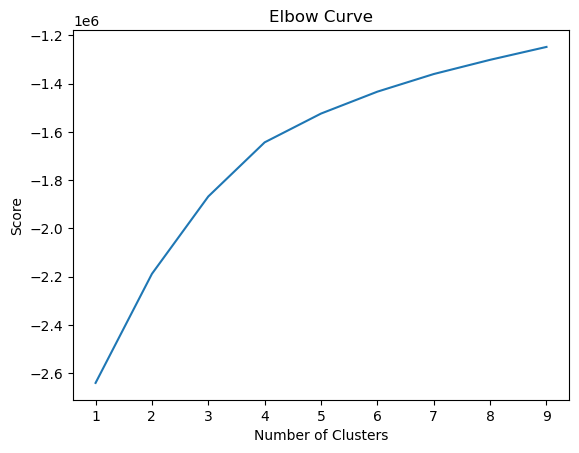

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

03. k-means clustering

In [23]:
# create k-means object
kmeans = KMeans(n_clusters = 3)

3 was chosen as the number of clusters as the curve begins to flatten between 3 and 4. The distance between 1,2,3 are roughly the same, where as the distance between 3 and 4 is not the same as between 1,2, and 3.

In [25]:
# fit k-means object to the data
kmeans.fit(spreads_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
spreads_df['clusters'] = kmeans.fit_predict(spreads_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_68119/1966434826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spreads_df['clusters'] = kmeans.fit_predict(spreads_df)


In [27]:
spreads_df.head()

,season,week,primetime,playoff_game,score_home,score_away,point_spread,total_line,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,result,cover_result,total_result,winner_id,loser_id,cover_map,clusters
0,2016,1,1,0,21,20,-3.0,40.5,0,82,2,0,1,41,0,1,1,1,10,5,10,1
1,2016,1,1,0,21,23,-8.5,44.0,0,72,0,1,-2,44,1,0,0,2,22,1,22,1
2,2016,1,0,0,24,31,-2.5,47.0,0,72,0,1,-7,55,1,0,0,1,30,2,30,1
3,2016,1,0,0,13,7,-3.0,44.5,0,82,7,0,6,20,1,1,1,0,3,4,3,1
4,2016,1,0,0,19,20,-1.0,47.5,0,72,0,1,-1,39,0,0,2,0,24,9,0,1


In [28]:
spreads_df['clusters'].value_counts()

clusters
1    868
2    748
0    575
Name: count, dtype: int64

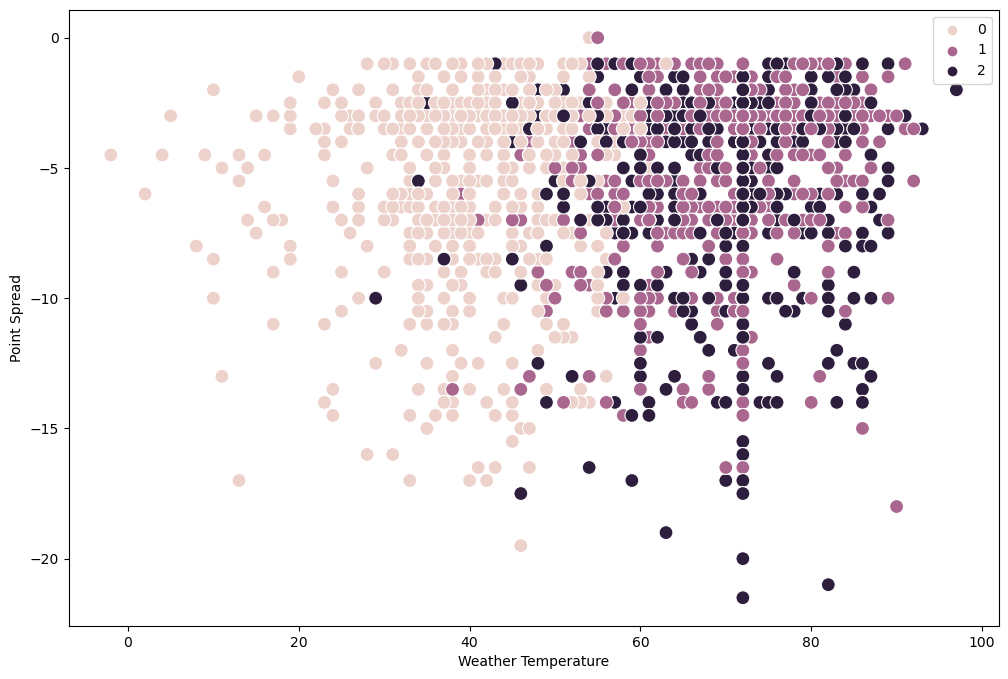

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=spreads_df['weather_temp'], y=spreads_df['point_spread'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Weather Temperature')
plt.ylabel('Point Spread')
plt.show()

Blue clusters (2) seems to indicate games where the temperature was below or around 60 degrees and point spreads of -10 or less. Purple clusters (1) seem to be distributed anywhere between 40 and 90 degree temperatures with majority coming around the 60-70 range. The pink clusters (0) are fairly similar to the purple clusters but seem to contain a good amount of the extreme values, meaning either large point spreads or high temperatures.

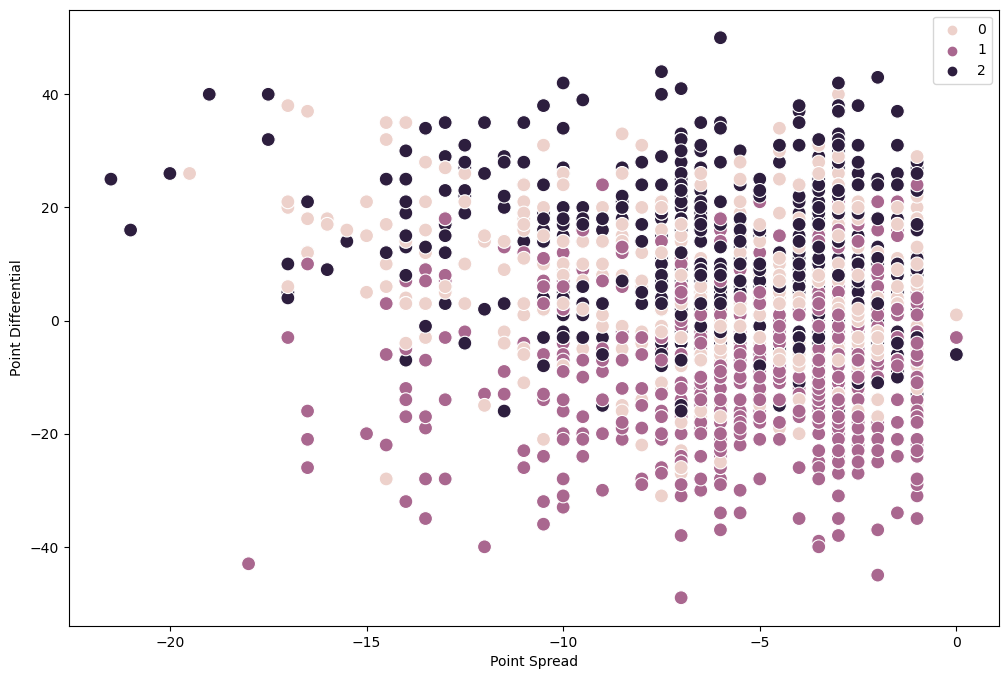

In [31]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=spreads_df['point_spread'], y=spreads_df['point_differential'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Point Spread')
plt.ylabel('Point Differential')
plt.show()

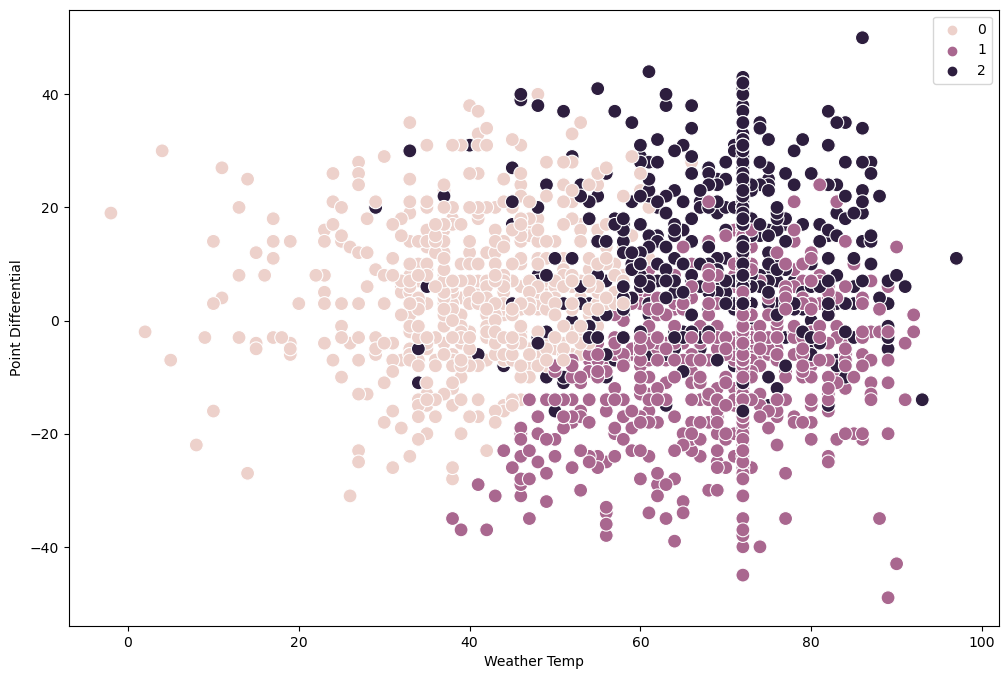

In [32]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=spreads_df['weather_temp'], y=spreads_df['point_differential'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Weather Temp')
plt.ylabel('Point Differential')
plt.show()

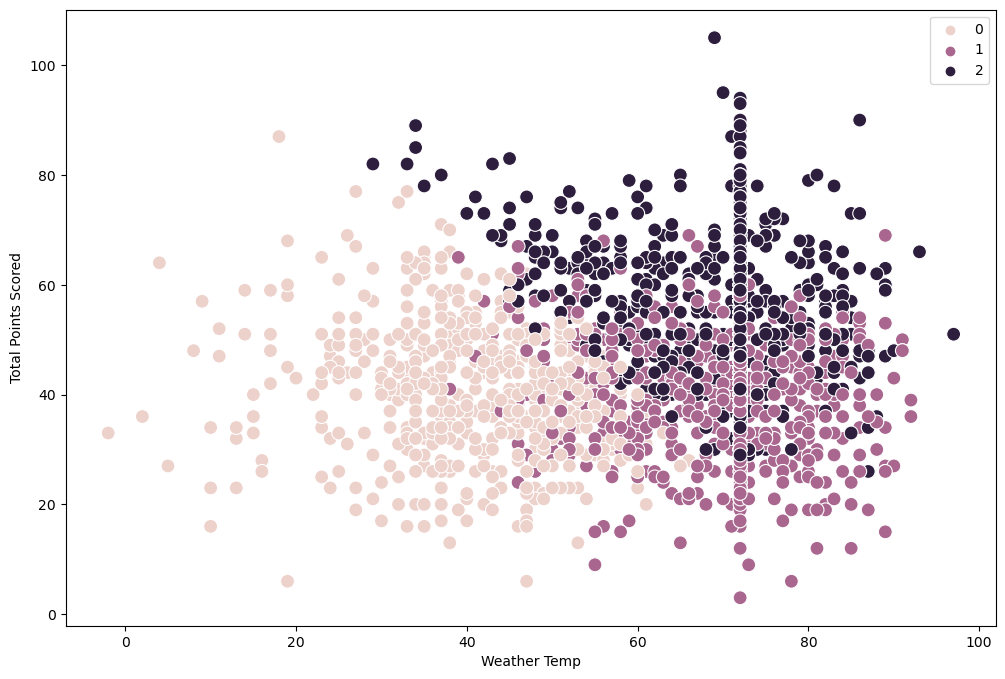

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=spreads_df['weather_temp'], y=spreads_df['total_points_scored'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Weather Temp')
plt.ylabel('Total Points Scored')
plt.show()

The blue clusters (2) are most densely distributed in temperatures below 60 degrees with less plots above 60 total points scored. The pink clusters (0), are most dense in the 60-80 degree range with less than 60 points being scored in a game. Last, the purple clusters (1), represent higher total points scored and higher temperatures. 

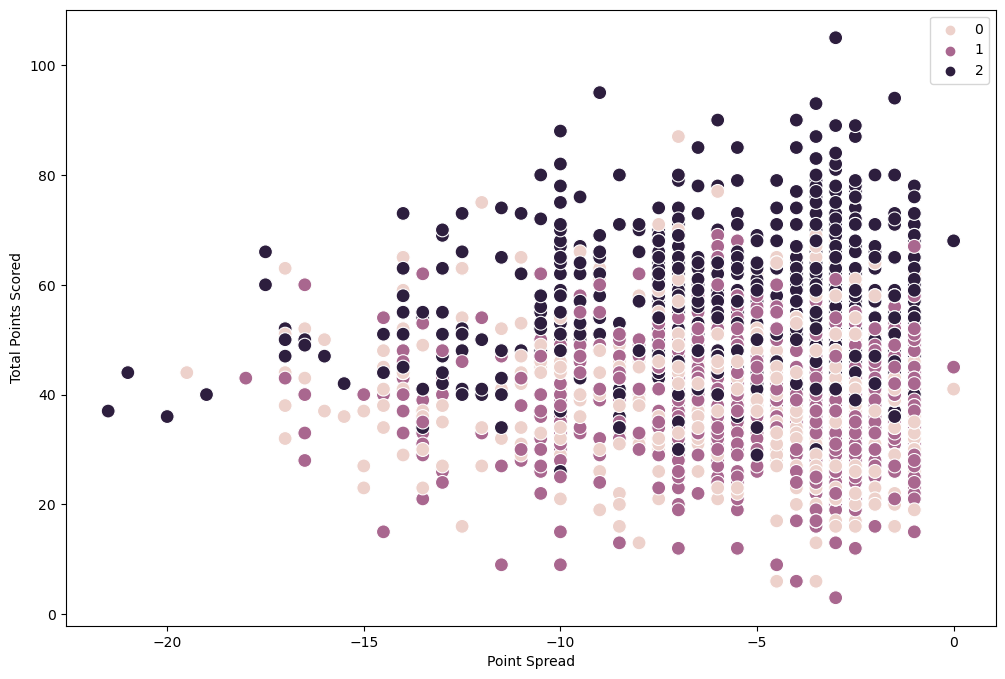

In [35]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=spreads_df['point_spread'], y=spreads_df['total_points_scored'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Point Spread')
plt.ylabel('Total Points Scored')
plt.show()

In the above, were clustering point spreads and total points scored in games. The light pink clusters (0), has a wide range when looking at point spread/total points scored plots but is most densley positioned closer to point spreads of 0-10, and lower total points scored. The purple clusters (1) are seemingly more evenly distributed but are more concentrated around -10 to -5 with higher total points scored than the pink cluster. Lastly, the blue clusters (2), are also mainly concentrated between -10 and -5 but are positioned for what seems like outliers or extreme values in either data point. I think the clusters mostly make sense, although there may be a way to separate the blue and pink clusters to create a better picutre.

In [37]:
spreads_df.head()

,season,week,primetime,playoff_game,score_home,score_away,point_spread,total_line,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,result,cover_result,total_result,winner_id,loser_id,cover_map,clusters
0,2016,1,1,0,21,20,-3.0,40.5,0,82,2,0,1,41,0,1,1,1,10,5,10,1
1,2016,1,1,0,21,23,-8.5,44.0,0,72,0,1,-2,44,1,0,0,2,22,1,22,1
2,2016,1,0,0,24,31,-2.5,47.0,0,72,0,1,-7,55,1,0,0,1,30,2,30,1
3,2016,1,0,0,13,7,-3.0,44.5,0,82,7,0,6,20,1,1,1,0,3,4,3,1
4,2016,1,0,0,19,20,-1.0,47.5,0,72,0,1,-1,39,0,0,2,0,24,9,0,1


In [38]:
spreads_df.loc[spreads_df['clusters'] == 2, 'cluster'] = 'blue'
spreads_df.loc[spreads_df['clusters'] == 1, 'cluster'] = 'purple'
spreads_df.loc[spreads_df['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_68119/142434110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spreads_df.loc[spreads_df['clusters'] == 2, 'cluster'] = 'blue'


In [39]:
spreads_df.groupby('cluster').agg({'weather_temp':['mean', 'median'],
                                   'point_spread':['mean', 'median'],
                                   'total_points_scored':['mean', 'median']})                                   

weather_temp        point_spread        total_points_scored       
                mean median         mean median                mean median
cluster                                                                   
blue       69.367647   72.0    -5.517380   -4.0           56.729947   56.5
pink       40.554783   41.0    -5.694783   -4.5           40.502609   40.0
purple     69.834101   72.0    -4.821429   -3.5           39.382488   40.0

04. Opinion

I think these statistics could be most helpful in a predictive model where we are attempting to predict total points scored. There are definitely more variables that must be included but it is a starting point.

In [42]:
spreads_df.to_csv(os.path.join(path,'02 Data', 'cleaned data', 'NFL_Spreads_clusters.csv'))